# More Examples of 1-1

In [12]:
%matplotlib inline
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.fft
import os

import sys
#sys.path.append('/home/jovyan/scattering_transform/')
sys.path.append('/home/xavier/Projects/Oceanography/python/scattering_transform/')

import scattering
from scattering.Scattering2d import Scattering2d
import h5py 

# Load data

In [2]:
feature_path = os.path.join(os.getenv('OS_SST'),
                            'MODIS_L2', 'PreProc', 'MODIS_R2019_2003_95clear_128x128_preproc_std.h5')

In [3]:
features = h5py.File(feature_path, 'r')['valid']

In [4]:
num_samples = features.shape[0]

# Grab 10 random images

In [5]:
np.random.seed(0)
sampled_id = np.sort(np.random.randint(0, num_samples, 10))
sampled_features = np.squeeze(features[sampled_id], axis=1)

In [6]:
sampled_features.shape

(10, 64, 64)

In [7]:
#plt.figure(figsize=(3,3), dpi=200)
#for i in range(9):
#    plt.subplot(3, 3, i+1)
#    plt.imshow(sampled_features[i], vmin=-3.1, vmax=2.6)
#    plt.xticks([]); plt.yticks([]); 
#plt.show()

In [8]:
M = N = 64
J = int(np.log2(min(M,N))) - 1
J

5

# 1-1 Examples

In [26]:
def run_and_show(idx):
    reload(scattering)
    # load image (expecting [1,M,N] shape)
    image_target = sampled_features[idx:idx+1]
    
    # synthesize
    image_syn, results = scattering.synthesis('s_cov', image_target, seed=0, 
                                              remove_edge=True, verbose=True,
                                             return_extras=True)
    
    # show
    scattering.show(image_target, image_syn, (-5, 5))
    return image_syn, results

## 0

input_size:  (1, 64, 64)
J = 5, L = 4
# of estimators:  5001
max residual:  6.835359 , mean residual:  0.041467417
max residual:  0.0015323153 , mean residual:  0.00012087885
time used:  14.332846403121948 s


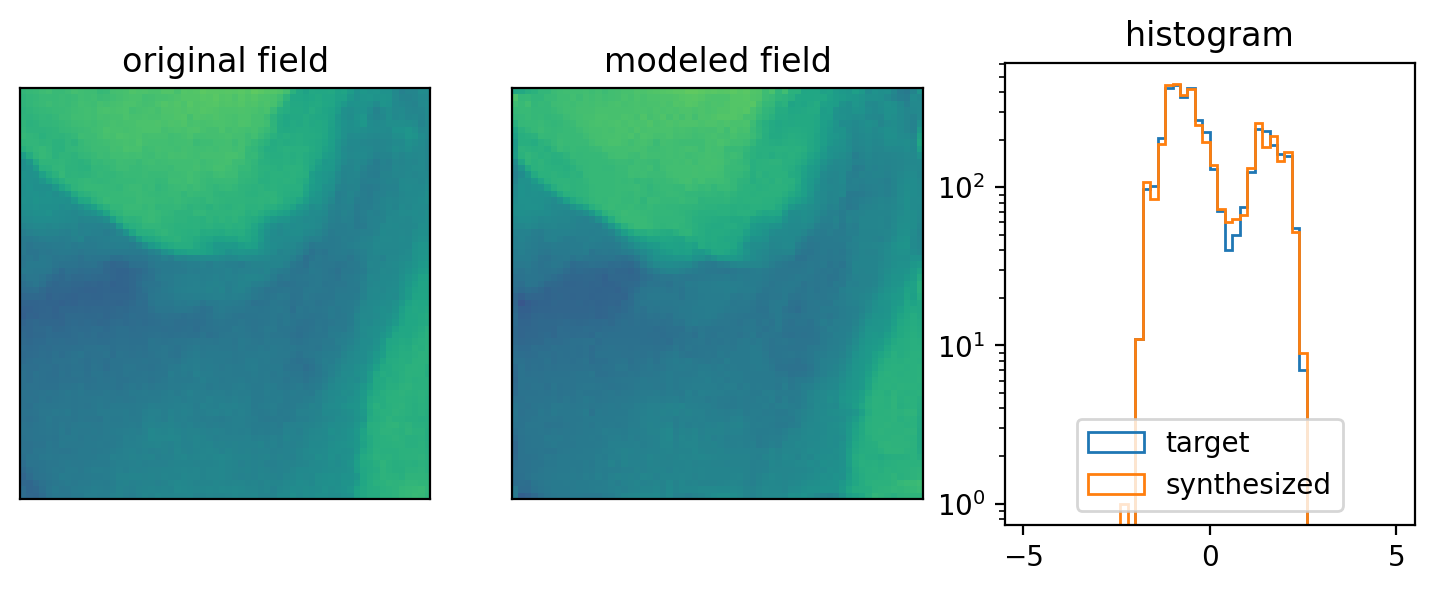

In [27]:
img, results = run_and_show(0)

## Coefficients

In [13]:
#reload(Scattering2d)
idx=0
image = sampled_features[idx:idx+1]
C11_criteria = 'j2>=j1'
normalization='P00'
pseudo_coef=1
remove_edge = True
#
M=N=64
J=5
L=4
if not torch.cuda.is_available(): device='cpu'
wavelets='morlet'
l_oversampling=1
frequency_factor=1
st_calc = Scattering2d(M, N, J, L, device, wavelets, 
                       l_oversampling=l_oversampling, 
                       frequency_factor=frequency_factor)
st_calc.add_ref(ref=image)
#
r0 = st_calc.scattering_cov(image,
                use_ref=True, C11_criteria=C11_criteria, 
                normalization=normalization, pseudo_coef=pseudo_coef,remove_edge=remove_edge)

In [36]:
r0.keys()

dict_keys(['var', 'mean', 'P00', 'P00_iso', 'S1', 'S1_iso', 'C01', 'C01_iso', 'C11_pre_norm', 'C11_pre_norm_iso', 'C11', 'C11_iso', 'P11', 'P11_iso', 'for_synthesis', 'for_synthesis_iso', 'index_for_synthesis', 'index_for_synthesis_iso'])

In [40]:
r0['S1']

tensor([[[0.0353, 0.0358, 0.0331, 0.0364],
         [0.0535, 0.0519, 0.0463, 0.0492],
         [0.0958, 0.0898, 0.0768, 0.0823],
         [0.1870, 0.1922, 0.1525, 0.1616],
         [0.3329, 0.4425, 0.2991, 0.1777]]])

In [41]:
r0['S1_iso']

tensor([[0.0352, 0.0502, 0.0862, 0.1733, 0.3131]])

In [39]:
r0['P11'].shape

torch.Size([1, 5, 5, 4, 4])

In [53]:
r0['P00']

tensor([[[0.0034, 0.0070, 0.0036, 0.0058],
         [0.0052, 0.0072, 0.0058, 0.0059],
         [0.0137, 0.0165, 0.0132, 0.0127],
         [0.0450, 0.0556, 0.0398, 0.0372],
         [0.1179, 0.2190, 0.1069, 0.0354]]])

In [54]:
r0['S1']**2

tensor([[[0.0012, 0.0013, 0.0011, 0.0013],
         [0.0029, 0.0027, 0.0021, 0.0024],
         [0.0092, 0.0081, 0.0059, 0.0068],
         [0.0350, 0.0369, 0.0233, 0.0261],
         [0.1108, 0.1958, 0.0894, 0.0316]]])

In [55]:
st_calc.weight

## More coefficients

In [14]:
coeff0 = st_calc.scattering_coef(image)

tensor([[0.0416, 0.0438, 0.0396, 0.0432]]) tensor([[0.0054, 0.0124, 0.0057, 0.0101]])
tensor([[0.0704, 0.0715, 0.0645, 0.0663]]) tensor([[0.0110, 0.0198, 0.0118, 0.0166]])
tensor([[0.1264, 0.1233, 0.1114, 0.1113]]) tensor([[0.0253, 0.0380, 0.0245, 0.0308]])
tensor([[0.2232, 0.2222, 0.2061, 0.1919]]) tensor([[0.0598, 0.0788, 0.0589, 0.0592]])
tensor([[0.3011, 0.4141, 0.3185, 0.1851]]) tensor([[0.0995, 0.1944, 0.1162, 0.0404]])


In [47]:
coeff0.keys()

dict_keys(['var', 'mean', 'S0', 'S1', 'S1_iso', 'S2', 'S2_iso', 's21', 's22', 'P00', 'P00_iso', 'P11', 'P11_iso', 'for_synthesis', 'for_synthesis_iso'])

In [45]:
coeff0['S2'].shape

torch.Size([1, 5, 5, 4, 4])

In [48]:
coeff0['s22']

tensor([[[2.2778, 2.5313, 2.6543, 2.6483, 2.4464],
         [   nan, 2.4309, 2.5276, 2.4745, 2.1510],
         [   nan,    nan, 2.2874, 2.2685, 1.7132],
         [   nan,    nan,    nan, 1.6071, 1.2152],
         [   nan,    nan,    nan,    nan, 0.8026]]])

In [50]:
coeff0['s21']

tensor([[[0.1561, 0.2072, 0.2163, 0.2085, 0.1779],
         [   nan, 0.1593, 0.2176, 0.2331, 0.2016],
         [   nan,    nan, 0.1530, 0.2138, 0.2060],
         [   nan,    nan,    nan, 0.1340, 0.1718],
         [   nan,    nan,    nan,    nan, 0.1062]]])

In [51]:
s22 = np.nanmean(coeff0['s22'])
s22

2.1357408

In [52]:
s21 = np.nanmean(coeff0['s21'])
s21

0.18415666

## 1

input_size:  (1, 64, 64)
# of estimators:  5001
max residual:  6.11165 , mean residual:  0.02870434
max residual:  0.0026083216 , mean residual:  0.00024773725
time used:  13.30737853050232 s


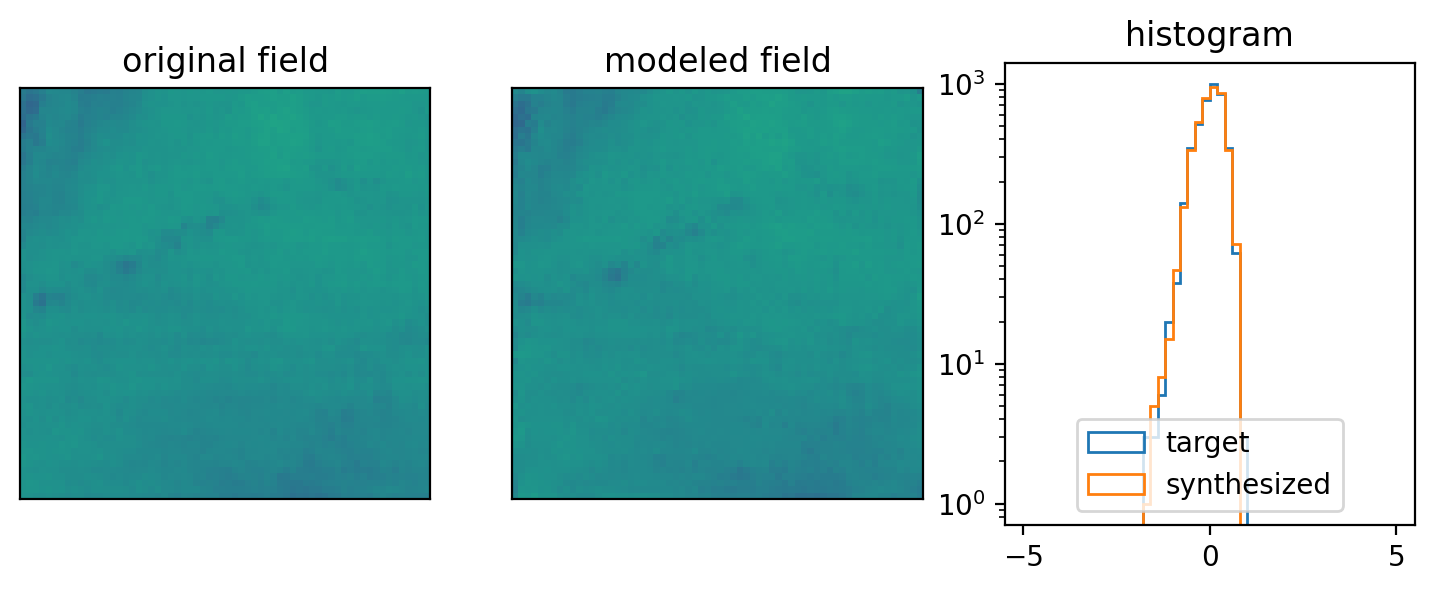

In [20]:
run_and_show(1)

----

# Grabbing the coefficients